In [15]:
import numpy as np
import pandas as pd
import mygene
import omnipath as op
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import mellon as ml
from pyensembl import EnsemblRelease
import random
import netrd
import networkx as nx
import copy

In [16]:
pvals_LR_df = pd.read_csv('processed_data/02a_bootstrapped_disease_comparisons/padj_overlapping_LRs_singlecol.csv')
pvals_LRI_df = pd.read_csv('processed_data/02a_bootstrapped_disease_comparisons/padj_overlapping_LRIs_singlecol.csv')
pvals_dist_df = pd.read_csv('processed_data/02a_bootstrapped_disease_comparisons/padj_deltacon_distances_singlecol.csv')

In [17]:
real_LR_intersects = pd.read_csv('processed_data/02a_bootstrapped_disease_comparisons/real_overlapping_LRs_singlecol.csv', index_col = 0)
real_LRI_intersects = pd.read_csv('processed_data/02a_bootstrapped_disease_comparisons/real_overlapping_LRIs_singlecol.csv', index_col = 0)
real_distances = pd.read_csv('processed_data/02a_bootstrapped_disease_comparisons/real_deltacon_distances_singlecol.csv', index_col = 0)

pvals_LR = copy.copy(real_LR_intersects)
pvals_LRI = copy.copy(real_LRI_intersects)
pvals_dist = copy.copy(real_distances)

In [18]:
disease_list = list(real_LR_intersects.index)
count = 0
for disease1 in disease_list:
    for disease2 in disease_list:
        if disease1!=disease2:
            pvals_LR[disease1].loc[disease2] = pvals_LR_df['padj'].loc[count]
            pvals_LRI[disease1].loc[disease2] = pvals_LRI_df['padj'].loc[count]
            pvals_dist[disease1].loc[disease2] = pvals_dist_df['padj'].loc[count]
            count+=1
        else:
            pvals_LR[disease1].loc[disease2] = 1.0
            pvals_LRI[disease1].loc[disease2] = 1.0
            pvals_dist[disease1].loc[disease2] = 1.0
        
        

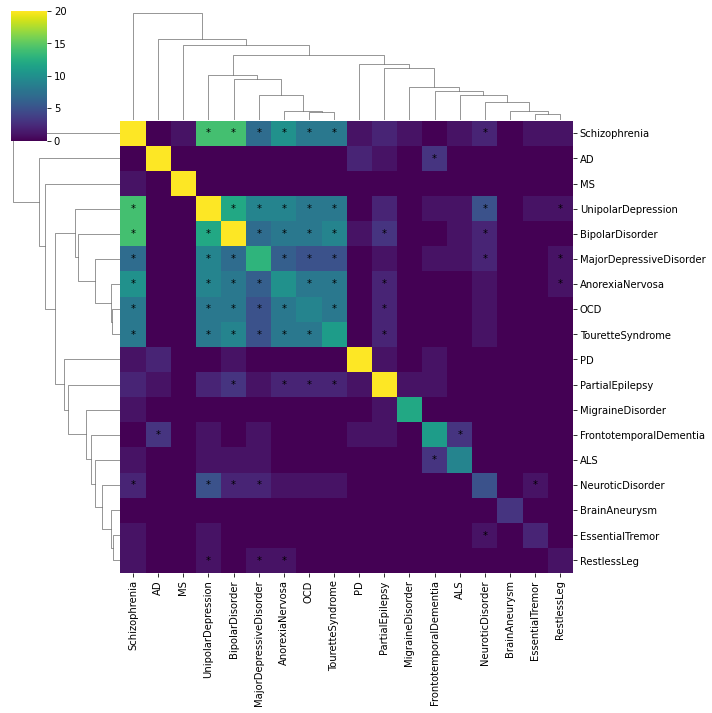

In [19]:
# Visualise overlapping LRs
g = sns.clustermap(real_LR_intersects, vmax = 20, cmap = 'viridis')
mask = pvals_LR < 0.1
# Get the order of the rows and columns from the clustermap
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the mask according to the clustermap
mask = mask.iloc[row_order, col_order]

# Iterate over the data and add a marker for significant p-values
for text in g.ax_heatmap.texts:
    text.set_visible(False)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask.iloc[i, j]:
            g.ax_heatmap.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black')
plt.savefig('plots/02-clustering_with_LR_partners/02b_plot_bootstrapped_disease_comparisons/LR_overlaps_padj.png', bbox_inches = 'tight', dpi = 300)
plt.show()

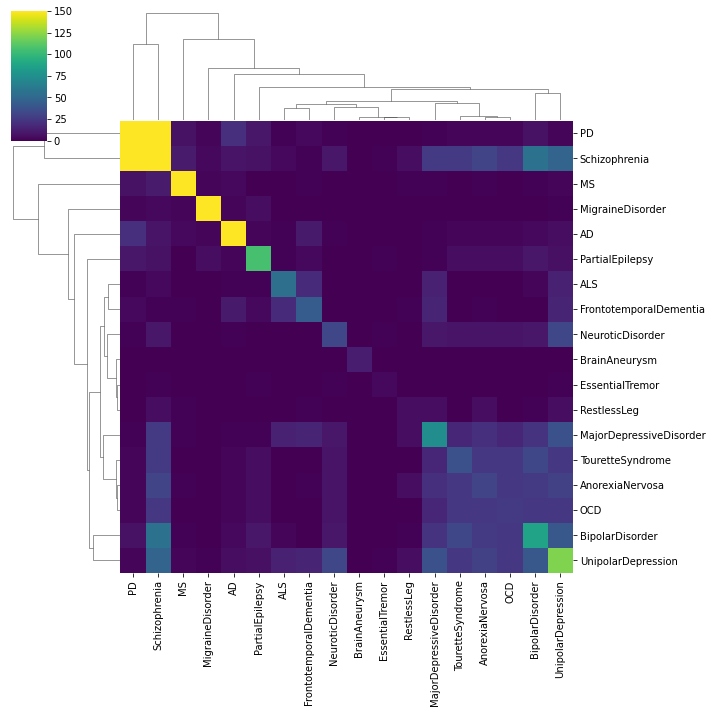

In [20]:
# Visualise overlapping LRIs
g = sns.clustermap(real_LRI_intersects, vmax = 150, cmap = 'viridis')
mask = pvals_LRI < 0.1
# Get the order of the rows and columns from the clustermap
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the mask according to the clustermap
mask = mask.iloc[row_order, col_order]

# Iterate over the data and add a marker for significant p-values
for text in g.ax_heatmap.texts:
    text.set_visible(False)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask.iloc[i, j]:
            g.ax_heatmap.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black')
plt.savefig('plots/02-clustering_with_LR_partners/02b_plot_bootstrapped_disease_comparisons/LRI_overlaps_padj.png', bbox_inches = 'tight', dpi = 300)
plt.show()

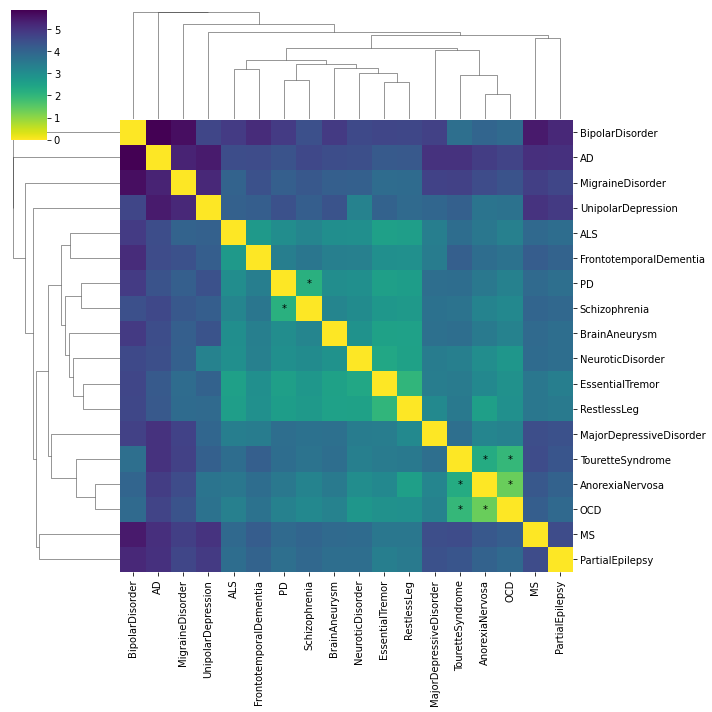

In [21]:
# Visualise Deltacon distances
g = sns.clustermap(real_distances, cmap = 'viridis_r')
mask = pvals_dist < 0.1
# Get the order of the rows and columns from the clustermap
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the mask according to the clustermap
mask = mask.iloc[row_order, col_order]

# Iterate over the data and add a marker for significant p-values
for text in g.ax_heatmap.texts:
    text.set_visible(False)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask.iloc[i, j]:
            g.ax_heatmap.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black')
plt.savefig('plots/02-clustering_with_LR_partners/02b_plot_bootstrapped_disease_comparisons/deltacon_disease_distances_padj.png', bbox_inches = 'tight', dpi = 300)
plt.show()